# Classroom notebook Linear methods 3

In [1]:
import numpy as np
from scipy.sparse import csr_matrix

A = np.eye(10_000)
print(A.nbytes/1024/1024)

762.939453125


In [2]:
S = csr_matrix(A)
print(S.data.nbytes)

80000


[1. 1. 1. ... 1. 1. 1.]


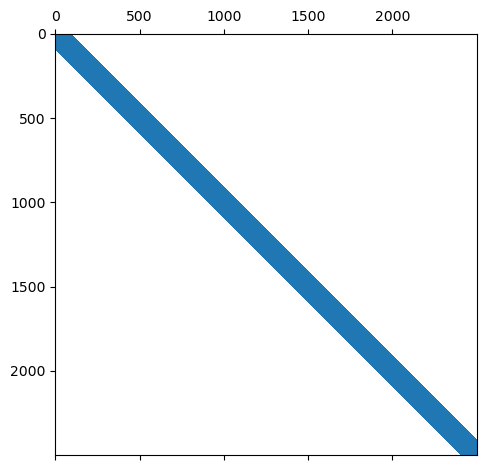

In [3]:
from scipy.sparse import diags
import matplotlib.pyplot as plt
Nx,Ny = 50,50
Nc = Nx * Ny

e = np.ones(Nc)
print(e)

A = diags([e,e,-4*e,e,e], [-Nx, -1, 0, 1, Nx], shape=(Nc,Nc))

plt.spy(A, marker='o',markersize=6)
plt.tight_layout()

In [4]:
print(A)

  (50, 0)	1.0
  (51, 1)	1.0
  (52, 2)	1.0
  (53, 3)	1.0
  (54, 4)	1.0
  (55, 5)	1.0
  (56, 6)	1.0
  (57, 7)	1.0
  (58, 8)	1.0
  (59, 9)	1.0
  (60, 10)	1.0
  (61, 11)	1.0
  (62, 12)	1.0
  (63, 13)	1.0
  (64, 14)	1.0
  (65, 15)	1.0
  (66, 16)	1.0
  (67, 17)	1.0
  (68, 18)	1.0
  (69, 19)	1.0
  (70, 20)	1.0
  (71, 21)	1.0
  (72, 22)	1.0
  (73, 23)	1.0
  (74, 24)	1.0
  :	:
  (2425, 2475)	1.0
  (2426, 2476)	1.0
  (2427, 2477)	1.0
  (2428, 2478)	1.0
  (2429, 2479)	1.0
  (2430, 2480)	1.0
  (2431, 2481)	1.0
  (2432, 2482)	1.0
  (2433, 2483)	1.0
  (2434, 2484)	1.0
  (2435, 2485)	1.0
  (2436, 2486)	1.0
  (2437, 2487)	1.0
  (2438, 2488)	1.0
  (2439, 2489)	1.0
  (2440, 2490)	1.0
  (2441, 2491)	1.0
  (2442, 2492)	1.0
  (2443, 2493)	1.0
  (2444, 2494)	1.0
  (2445, 2495)	1.0
  (2446, 2496)	1.0
  (2447, 2497)	1.0
  (2448, 2498)	1.0
  (2449, 2499)	1.0


In [5]:
print(np.arange(Nc).reshape(Nx,Ny)[::-1])

[[2450 2451 2452 ... 2497 2498 2499]
 [2400 2401 2402 ... 2447 2448 2449]
 [2350 2351 2352 ... 2397 2398 2399]
 ...
 [ 100  101  102 ...  147  148  149]
 [  50   51   52 ...   97   98   99]
 [   0    1    2 ...   47   48   49]]


In [6]:
T_bottom = np.arange(Nx)
print(T_bottom)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [7]:
T_top = T_bottom + (Ny-1)*Nx
print(T_top)

[2450 2451 2452 2453 2454 2455 2456 2457 2458 2459 2460 2461 2462 2463
 2464 2465 2466 2467 2468 2469 2470 2471 2472 2473 2474 2475 2476 2477
 2478 2479 2480 2481 2482 2483 2484 2485 2486 2487 2488 2489 2490 2491
 2492 2493 2494 2495 2496 2497 2498 2499]


In [8]:
T_left = np.arange(Ny)*(Nx)
print(T_left)

[   0   50  100  150  200  250  300  350  400  450  500  550  600  650
  700  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350
 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050
 2100 2150 2200 2250 2300 2350 2400 2450]


In [9]:
T_right = T_left + Nx-1
print(T_right)

[  49   99  149  199  249  299  349  399  449  499  549  599  649  699
  749  799  849  899  949  999 1049 1099 1149 1199 1249 1299 1349 1399
 1449 1499 1549 1599 1649 1699 1749 1799 1849 1899 1949 1999 2049 2099
 2149 2199 2249 2299 2349 2399 2449 2499]


In [10]:
bnd_all = np.unique(np.concatenate((T_bottom,T_top,T_left,T_right)))
print(bnd_all)

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   99  100  149  150  199
  200  249  250  299  300  349  350  399  400  449  450  499  500  549
  550  599  600  649  650  699  700  749  750  799  800  849  850  899
  900  949  950  999 1000 1049 1050 1099 1100 1149 1150 1199 1200 1249
 1250 1299 1300 1349 1350 1399 1400 1449 1450 1499 1500 1549 1550 1599
 1600 1649 1650 1699 1700 1749 1750 1799 1800 1849 1850 1899 1900 1949
 1950 1999 2000 2049 2050 2099 2100 2149 2150 2199 2200 2249 2250 2299
 2300 2349 2350 2399 2400 2449 2450 2451 2452 2453 2454 2455 2456 2457
 2458 2459 2460 2461 2462 2463 2464 2465 2466 2467 2468 2469 2470 2471
 2472 2473 2474 2475 2476 2477 2478 2479 2480 2481 2482 2483 2484 2485
 2486 2487 2488 2489 2490 2491 2492 2493 2494 2495 2496 2497 2498 2499]


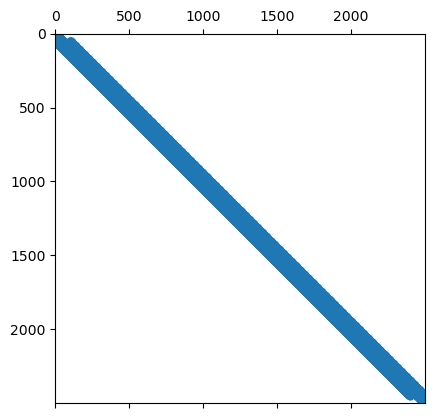

In [11]:
from scipy.sparse import lil_matrix

A = lil_matrix(A)
A[bnd_all,:] = 0
A[bnd_all,bnd_all] = 1
plt.spy(A,marker='o',markersize=5)

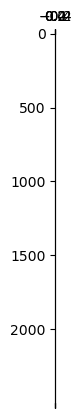

In [12]:
b = np.zeros(Nc)
b[T_bottom] = 10
b[T_top] = 20
b[T_left] = 30
b[T_right] = 40
plt.spy(b[:,None],marker='o')

In [13]:
from scipy.sparse.linalg import spsolve
T = spsolve(A.tocsc(),b)
print(T.reshape(Nx,Ny)[::-1])


[[30.         20.         20.         ... 20.         20.
  40.        ]
 [30.         25.         23.02354329 ... 26.0287693  29.99088054
  40.        ]
 [30.         26.97645671 25.         ... 29.96352241 33.93475288
  40.        ]
 ...
 [30.         23.9712307  20.03647759 ... 25.         30.92952688
  40.        ]
 [30.         20.00911946 16.06524712 ... 19.07047312 25.
  40.        ]
 [30.         10.         10.         ... 10.         10.
  40.        ]]


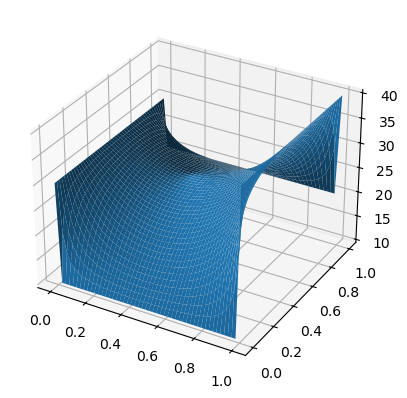

In [14]:
x,y = np.meshgrid(np.linspace(0,1,Nx), np.linspace(0,1,Ny))
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.plot_surface(x,y,T.reshape(Nx,Ny))